# The initial problem

In this example we are solving the following equation:
\begin{equation}
\frac{\partial \mathbf{X}}{\partial t} - [\nabla \times [ \nabla \times \mathbf{X}]] = \mathbf{F}
\end{equation}

on the rectangular manifold:
$x \in [0,1]$, $y \in [0,0.2]$, $z \in [0,1.5]$.

Let's consider the forcing vector
  \begin{align*}
    \mathbf{F} &= \begin{pmatrix}
           -[2 + 3z(z-1.5)]\exp(-3t) \\
           0 \\
           -(\pi^{2}+3)\exp(\pi y - 3t) \\
         \end{pmatrix}
  \end{align*}

and boudary conditions

\begin{equation*}
\left. X_{x} \right|_{z=0} = 0;  \left. X_{x} \right|_{z=1.5} = 0
\end{equation*}
\begin{equation*}
\left. X_{y} \right|_{x=0} = 0;  \left. X_{y} \right|_{x=1} = 0
\end{equation*}
\begin{equation*}
\left. X_{z} \right|_{y=0} = \exp(-3t);  \left. \frac{\partial X_{z}}{\partial y}\right|_{y=2} = \pi \exp(\pi y -3t).
\end{equation*}

The initial condition is

  \begin{align}
    \mathbf{X}(x,y,z,t=0) &= \begin{pmatrix}
           z(z-1.5) \\
           0 \\
           \exp(\pi y) \\
         \end{pmatrix}
  \end{align}

In this case, the solution of the first equation will be


  \begin{align}
    \mathbf{X}(x,y,z,t) &= \begin{pmatrix}
           z(z-1.5)\exp(-3t) \\
           0 \\
           \exp(\pi y - 3t) \\
         \end{pmatrix}
  \end{align}

# Finite element method and the weak form

Now we are going to write eq. (1) in the weak form. We will proceed as follows: 

$\textbf{1}$ -- multiply eq. (1) by a trial function $\mathbf{w}$ and integrate it over the whole domain

\begin{equation}
\int \mathbf{w} \cdot \frac{\partial \mathbf{X}}{\partial t}dV - \int \mathbf{w} \cdot [\nabla \times [ \nabla \times \mathbf{X}]]dV = \int \mathbf{w}\cdot \mathbf{F}dV.
\end{equation}

$\textbf{2}$ -- make use of $[\nabla \times [ \nabla \times \mathbf{X}]] = \nabla ( \nabla \cdot \mathbf{X} ) - \nabla^{2} \mathbf{X}$ and rewrite eq. (3) in component notation

\begin{equation}
\int w_k \cdot \frac{\partial X_k}{\partial t}dV - \int w_k \partial_k (\partial_i X_i) dV + \int w_k \partial_i \partial_i X_k dV = \int w_k F_k dV.
\end{equation}

$\textbf{3}$ -- integrate by parts the middle two terms of eq. (4) and use the finite element method assumption that $\mathbf{w}=0$ at the boundary regions, where Dirichlet boundary conditions are specified.

\begin{equation}
\int w_k \cdot \frac{\partial X_k}{\partial t}dV - \int (\partial_k w_k)  (\partial_i X_i) dV + \int (\partial_i w_k)  (\partial_i X_k) dV =  -\int_{\text{Neumann b.c.}} w_k (\partial_i X_i) n_{k} dS + \int_{\text{Neumann b.c.}} w_k (\partial_i X_k) n_i dS + \int w_k F_k dV.
\end{equation}

Again, the two surface integrals on the right-hand side are non-zero over the regions where Neumann boundary conditions are introduced and zero if we are dealing with Dirichlet boundary conditions.

$\textbf{4}$ -- For the dirvergene-free case (i.e. $\partial_i X_i = 0$) the last equation has a simplier form:

\begin{equation}
\int w_k \cdot \frac{\partial X_k}{\partial t}dV + \int (\partial_i w_k)  (\partial_i X_k)dV = \int_{\text{Neumann b.c.}} w_k (\partial_i X_k) n_i dS + \int w_k F_k dV,
\end{equation}
so that in the finite element method's approach the dirvergene-free condition of the solution can be satisfied embarrassingly easyly.

For the Neumann boundary conditions we have

\begin{equation*}
\left. n_i\partial_i X_k \right|_{\delta \Omega} = f_k(\mathbf{x},t),
\end{equation*}

thus the final expression for the weak form of eq. (1) is

\begin{equation}
\int w_k \cdot \frac{\partial X_k}{\partial t}dV + \int (\partial_i w_k)  (\partial_i X_k)dV = \int_{\text{Neumann b.c.}} w_k f_k dS + \int w_k F_k dV,
\end{equation}

# The matrix-vector form

Now we need divide our manifold into cells and in each cell perform a decomposition of $\mathbf{w}$ and $\mathbf{X}$ by means of dealII basic functions which are uniquely associated with nodes of the cells (these basis functions live not in the manifold of our problem, but in a different manifold. Therefore, in our code when integration something we introduce Jacobian to go from one coordinate system to another)

In the simplest and most convenient form, the decomposition would look like

\begin{equation*}
w_k(\mathbf{x},t) = \sum\limits_{l} N_{kl}(\mathbf{\xi}(\mathbf{x})) c_{kl} (t), \quad X_k(\mathbf{x},t) = \sum\limits_{l} N_{kl}(\mathbf{\xi}(\mathbf{x})) d_{kl} (t)
\end{equation*}

where $N_{kl}(\mathbf{\xi}(\mathbf{x}))$ are the dealII basis functions, $c_{kl} (t)$ and $d_{kl} (t)$ are time-dependent weights of the decomposition process. In the sum $l$ goes over all nodes of a cell within which the position vector $\mathbf{x}$ is located.

Actually, we can even further simplify this expression, if we recall that each node has 3 degrees of freedom (because of 3 dimensions). Therefore, $N_{kl}$ can be written as $N_{3l+k}$, where $3l+k$ is a unique number. The maximum value of $3l+k$ for a cell represents the number of degrees of freedom in the cell, which is always three times larger than the number of nodes for the cell. 

We can then plug this decomposition expression into eq. (7), but now in the sum the index $a = 3l+k$ will cover not only degrees of freadom of a particular cell but that of the whole manifold, since we are performing the integration over the entire manifold, not just one cell.

\begin{equation}
\sum\limits_{l,m}\int N_{3l+k}N_{3m+k} c_{3l+k} \dot{d}_{3m+k} dV - \sum\limits_{l,m}\int N_{3l+k,i}N_{3m+k,i} c_{3l+k} d_{3m+k} dV = \sum\limits_{l}\int_{\text{Neumann b.c.}} N_{3l+k} c_{3l+k} f_k dV + \sum\limits_{l}\int N_{3l+k} c_{3l+k} F_k dV
\end{equation}

Several things to note: (1) the sum over $i$ and $k$ is also implied, (2) a dot over $d_{3m+k}$ denotes a time derivative, (3) a comma in N_{3l+k,i} represents a derivative of $N_{3l+k}$ with respect to ith spatial coordinate, (4) we can take the coefficients $d$ and $c$ out of the integrals.

The next step is to introduce the global matrices

\begin{equation*}
M_{ab} = \int N_{a}N_{b} dV, \quad K_{ab} = \int N_{a,i}N_{b,i} dV
\end{equation*}

and the global forcing vector

\begin{equation*}
F_{a} \equiv F_{3l+k} = \int N_{3l+k} F_k dV + \int_{\text{Neumann b.c.}} N_{3l+k} f_k dS.
\end{equation*}

This step allows us to rewrite eq. (8) in the matrix-vector form:

\begin{equation}
c_{a}M_{ab}\dot{d}_{b} + c_{a}K_{ab}d_{b} = c_{a}F_{a}.
\end{equation}

Since the last equation has to be true for any trial function $\mathbf{w}$ (i.e. for any coefficients  $c_{a}$), it immeideatly yields


\begin{equation}
\boxed{
M_{ab}\dot{d}_{b} + K_{ab}d_{b} = F_{a}.
}
\end{equation}


All the matrices and vectors in this equation are constructed in the "Assembly part of our code" and then the solution for this equation (i.e. the d-coefficients) is calculated in the "Solve" part of the code.

Note, that Dirichlet boundary conditions sit directly in d-coefficients, while Neumann's are in the forcing vector $F_{a}$.

# The last step. Dealing with time-dependance of the matrix vector form

To solve eq. (10) we need to discretize it in time. We will use the backward Euler method. The time now takes only discrete values:

\begin{equation*}
d_{b}(t) \approx d_{b}(t_{n}) \equiv d_{b}^{n},
\end{equation*}
i.e. the upper index denotes a point in time at which $d_{b}$ is evaluated.

Thus, at some point t=t_{n} we obtain

\begin{equation*}
M_{ab}^{n+1}\dot{d}^{n+1}_{b} + K_{ab}^{n+1}d^{n+1}_{b} = F^{n+1}_{a}.
\end{equation*}
We assume that both the matrices and the vectors can be time-dependent.

\begin{equation*}
\dot{d}^{n+1}_{b} \approx \frac{d^{n+1}_b - d_{b}^n}{\Delta t}
\end{equation*}

\begin{equation*}
 M_{ab} \frac{d^{n+1}_b - d_{b}^n}{\Delta t} + K_{ab}^{n+1}d_{b} = F^{n+1}_{a}
\end{equation*}

\begin{equation}
\boxed{
 (M_{ab} + \Delta t K_{ab}) d^{n+1}_b = \Delta t F^{n+1}_{a} + M_{ab} d^{n}_b
 }
\end{equation}

Therefore, by numerically solving eq. (11) n times we can obtain the solution at t^{n+1} if the initial conditions are specified.

In the code we introduce the system matrix $= M_{ab} + \Delta t K_{ab}$ and the right hand side vector (RHS) $= \Delta t F^{n+1}_{a} + M_{ab} d^{n}_b$.

# Analyzing the results of the initial problem

Here we are going to show the analytical and numerical solutions of the eq. (1) with the boundary and initial conditions specified above. We have divided our rectangular mesh into $5$, $10$ and $10$ cells along x, y and z dimensions respectively. Time $t$ goes from $0$ to $1$.

In [35]:
import numpy as np

import random
from scipy import integrate
from scipy import interpolate
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import AutoMinorLocator
% matplotlib notebook
import glob
import scipy
from IPython.display import Image

def plot_style(xticks=5,yticks=5):
    
    global ax,fig
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5

    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6

# The most interesting parts of the solution are $X_x(z)$ and $X_{z}(y)$

<IPython.core.display.Javascript object>


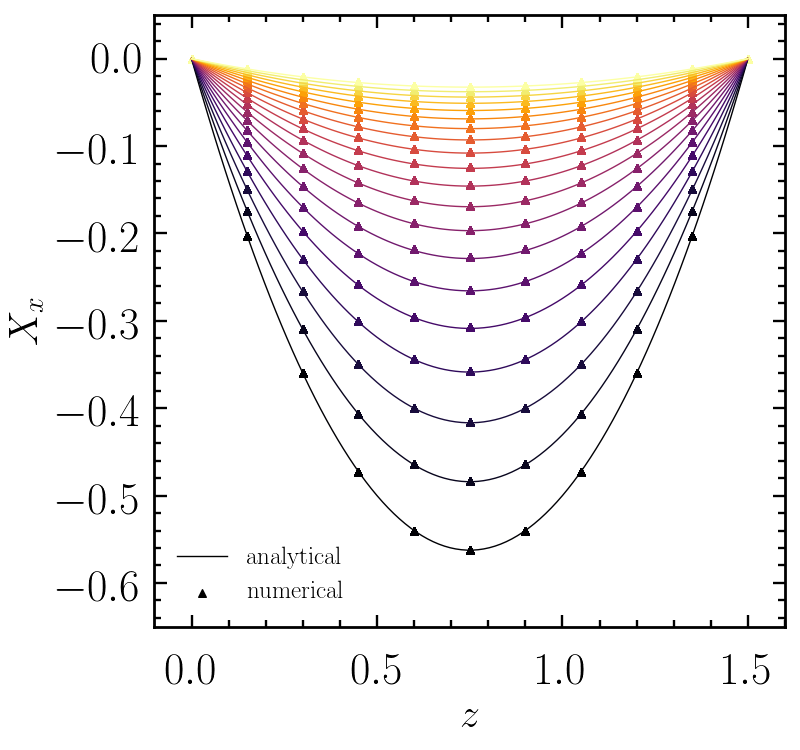

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [65]:
colormap =cm.inferno

plot_style()

plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 1, int(100/5))])
for i in range(0,100,5):
    data = np.loadtxt('output'+str(i)+'.dat')
    ax.scatter(data[:,2],data[:,3],marker='^',s=30)
    z = np.linspace(0,1.5,100)
    ones = np.ones(len(z))
    ax.plot(z,z*(z-1.5)*np.exp(-3*0.01*i),lw=1)


plt.xticks([0,0.5,1,1.5],fontsize=32)
plt.yticks([-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0],fontsize=32)


plt.plot([100,200],[100,200],lw=1,label='$\\rm analytical$',color='black')
plt.scatter([100,200],[100,200],s=30,label='$\\rm numerical$',color='black',marker='^')

plt.xlim(-0.1,1.6)
plt.ylim(-0.65,0.05)

ax.tick_params(axis='x', which='major', pad=20)
plt.ylabel('$X_{x}$',fontsize=29)
plt.xlabel('$z$',fontsize=29)
plt.legend(loc='lower left',fontsize=18,frameon=False)

<IPython.core.display.Javascript object>


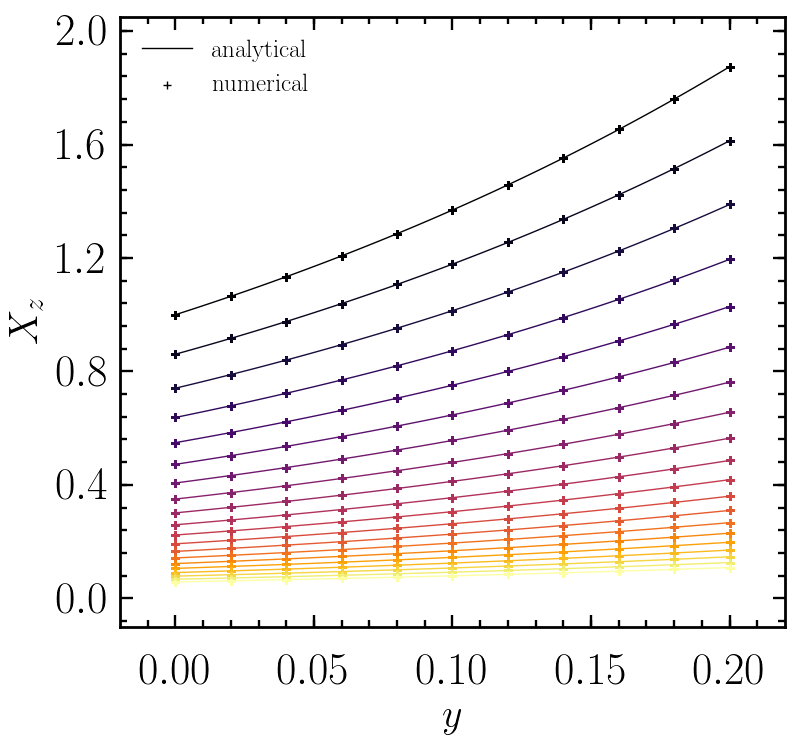

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [64]:
colormap =cm.inferno

plot_style()

plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 1, int(100/5))])
for i in range(0,100,5):
    data = np.loadtxt('output'+str(i)+'.dat')
    plt.scatter(data[:,1],data[:,5],s=40,marker='+')
    y = np.linspace(0,0.2,100)
    ones = np.ones(len(y))
    plt.plot(y,np.exp(np.pi*y-3*0.01*i),lw=1)


plt.xticks([0,0.05,0.1,0.15,0.2],fontsize=32)
plt.yticks([0,0.4,0.8,1.2,1.6,2],fontsize=32)

plt.plot([100,200],[100,200],lw=1,label='$\\rm analytical$',color='black')
plt.scatter([100,200],[100,200],s=30,label='$\\rm numerical$',color='black',marker='+')

plt.xlim(-0.02,0.22)
plt.ylim(-0.1,2.05)

ax.tick_params(axis='x', which='major', pad=20)
plt.ylabel('$X_{z}$',fontsize=29)
plt.xlabel('$y$',fontsize=29)
plt.legend(loc='upper left',fontsize=18,frameon=False)



# The plot below only shows that $X_{x}$ and $X_{z}$ do not depend on $x$.

<IPython.core.display.Javascript object>


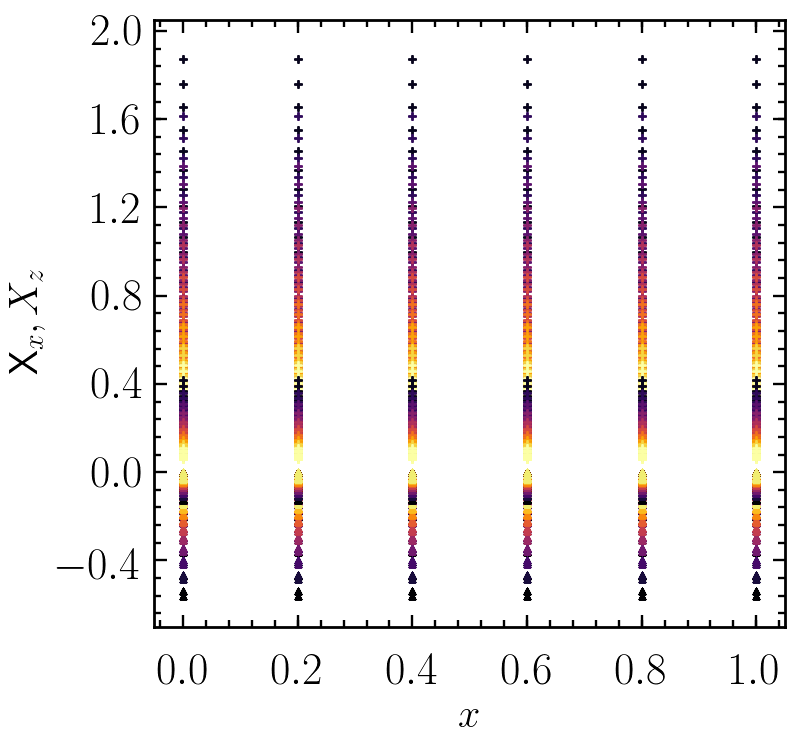

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [74]:
colormap =cm.inferno

plot_style()

plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 1, int(100/5))])
for i in range(0,100,5):
    data = np.loadtxt('output'+str(i)+'.dat')
    plt.scatter(data[:,0],data[:,3],marker='^',s=20)
    #plt.scatter(data[:,0],data[:,4],s=20)
    plt.scatter(data[:,0],data[:,5],marker='+',s=40)
    x = np.linspace(0,1,100)
    ones = np.ones(len(x))
    #plt.plot(x,ones*0.,lw=1)


plt.xticks([0,0.2,0.4,0.6,0.8,1.0],fontsize=32)
plt.yticks([-0.4,0,0.4,0.8,1.2,1.6,2],fontsize=32)

plt.plot([100,200],[100,200],lw=1,label='$\\rm analytical$',color='black')
plt.scatter([100,200],[100,200],s=30,label='$\\rm numerical$',color='black')

plt.xlim(-0.05,1.05)
plt.ylim(-0.7,2.05)

ax.tick_params(axis='x', which='major', pad=20)
plt.ylabel('X_{x},X_{z}$',fontsize=29)
plt.xlabel('$x$',fontsize=29)

# $X_{y}$ is always zero.

<IPython.core.display.Javascript object>


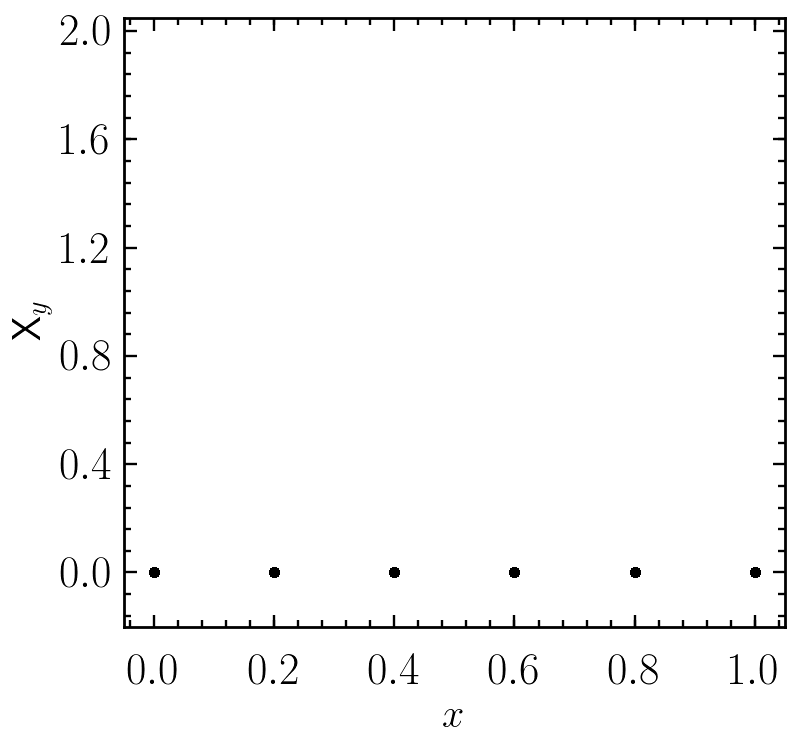

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [86]:
colormap =cm.inferno

plot_style()

plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 1, int(100/5))])
for i in range(0,100,5):
    data = np.loadtxt('output'+str(i)+'.dat')
    #plt.scatter(data[:,0],data[:,3],marker='^',s=20)
    plt.scatter(data[:,0],data[:,4],s=40,color='black')
    #plt.scatter(data[:,0],data[:,5],marker='+',s=40)
    x = np.linspace(0,1,100)
    ones = np.ones(len(x))
    #plt.plot(x,ones*0.,lw=1)


plt.xticks([0,0.2,0.4,0.6,0.8,1.0],fontsize=32)
plt.yticks([-0.4,0,0.4,0.8,1.2,1.6,2],fontsize=32)

plt.plot([100,200],[100,200],lw=1,label='$\\rm analytical$',color='black')
plt.scatter([100,200],[100,200],s=30,label='$\\rm numerical$',color='black')

plt.xlim(-0.05,1.05)
plt.ylim(-0.2,2.05)

ax.tick_params(axis='x', which='major', pad=20)
plt.ylabel('X_{y}$',fontsize=29)
plt.xlabel('$x$',fontsize=29)

# We can also create 2d plots. Let's consider t=1.0 (the last step)

<IPython.core.display.Javascript object>


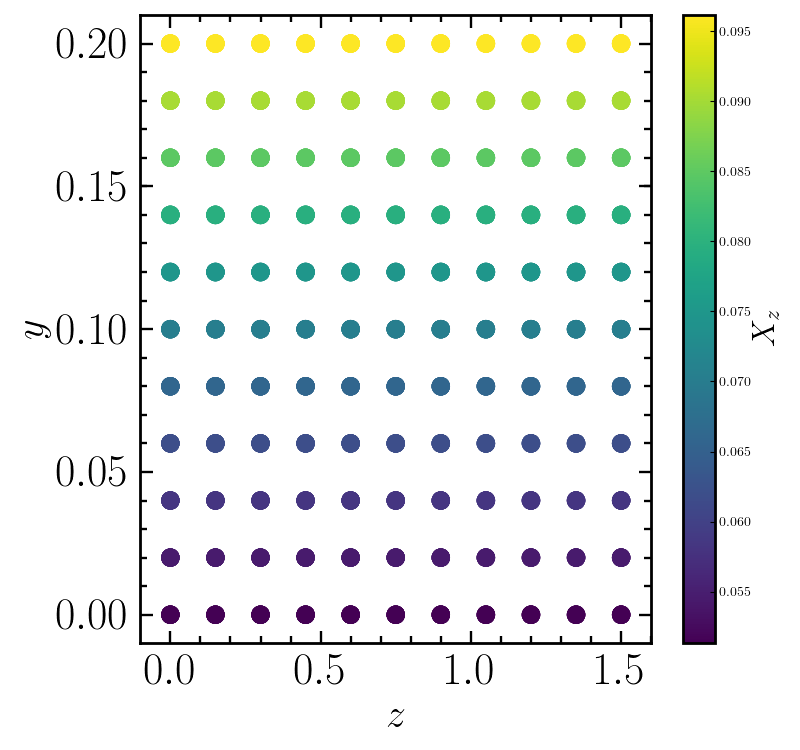

In [88]:
data = np.loadtxt('output99.dat')


plot_style()

plt.yticks([0,0.05,0.1,0.15,0.2],fontsize=32)

plt.ylim(-0.01,0.21)

plt.xticks([0,0.5,1,1.5],fontsize=32)
plt.xlim(-0.1,1.6)

plt.xlabel('$z$',fontsize=29)
plt.ylabel('$y$',fontsize=29)
color = data[:,5]
plot = plt.scatter(data[:,2],data[:,1],c = color,s=150, cmap=cm.viridis,vmin=np.min(color),vmax=np.max(color))
a = plt.colorbar(plot)
a.set_label('$X_{z}$',fontsize=23)

<IPython.core.display.Javascript object>


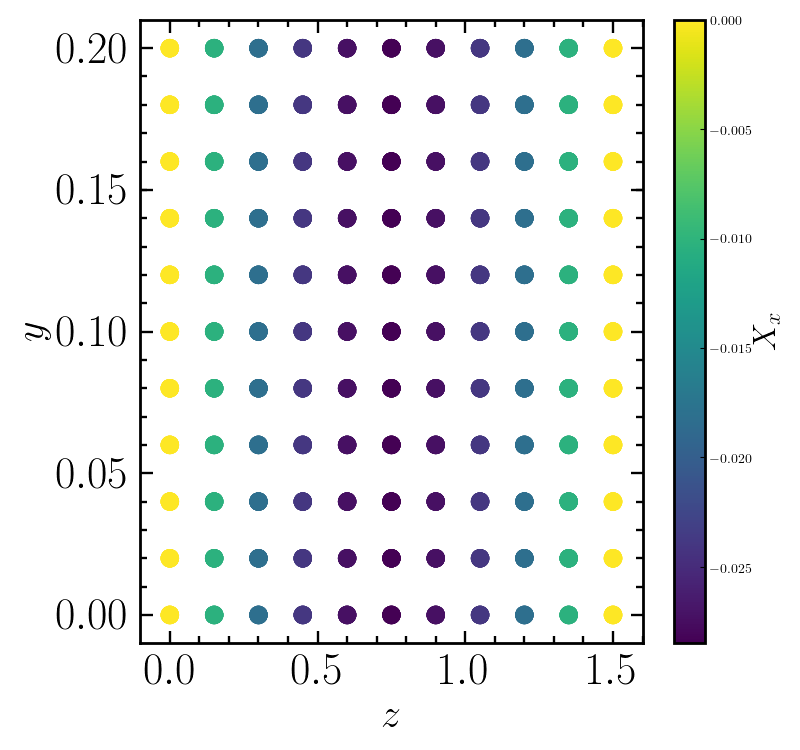

In [87]:
data = np.loadtxt('output99.dat')

plot_style()

plt.yticks([0,0.05,0.1,0.15,0.2],fontsize=32)

plt.ylim(-0.01,0.21)

plt.xticks([0,0.5,1,1.5],fontsize=32)
plt.xlim(-0.1,1.6)

plt.xlabel('$z$',fontsize=29)
plt.ylabel('$y$',fontsize=29)
color = data[:,3]
plot = plt.scatter(data[:,2],data[:,1],c = color,s=150, cmap=cm.viridis,vmin=np.min(color),vmax=np.max(color))
a = plt.colorbar(plot)
a.set_label('$X_{x}$',fontsize=23)

# The code also outputs .vtk files. E.g., let's take a look at our domain in 3d.

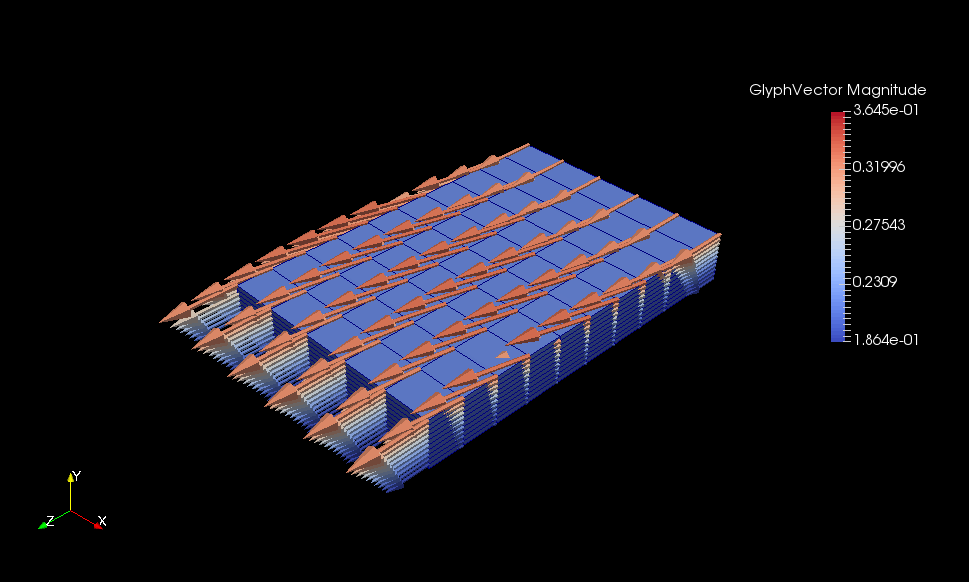

In [89]:
Image("/home/maryhallow/hope/3dview.png")